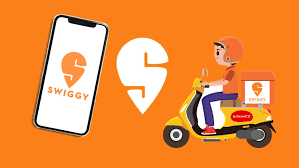

## Import Libraries

- Importing Libraries like pandas and numpy for Data Preprocessing.
- Also, Importing visualization libraries like Matplotlib, seaborn and plotly for better Data Visualization to get some important insights from data.
- here, Also importing warning and handle it with ignore filter to ignore warning.

In [1]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## Import Dataset

In [4]:
## import data

df = pd.read_csv("C:\\Users\\win\\OneDrive\\Documents\\Swiggy\\Swiggy_Analysis\\Swiggy Dataset.csv")

## Show First 5 Rows

In [5]:
## head() gives first five rows of dataset.

df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


## Information of Dataset

In [6]:
## info() gives information about dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


- here, we have total 5 columns.
- All have same datatype as object so we have to convert it.
- Shop_name, Cuisine and Location are categorical variable.
- Rating and Cost_for_Two are numerical variable.
- So, we have to convert Rating and Cost_for_Two into numeric datatype.

In [7]:
## using duplicated().sum() we can find how many duplicate rows are there.

df.duplicated().sum()

0

- here, we don't have duplicate rows.

# Exploratory Data Analysis (EDA)

## Data Preprocessing

- First, Start with Rating column.
- To change datatype from  object to numeric (float).

### Rating Analysis

In [8]:
## Check count of unique values in Rating.

df.Rating.value_counts()

4.1    30
4.3    23
4      21
3.9    13
4.2    10
3.7     6
4.4     4
3.8     4
3.6     2
4.6     2
4.8     1
4.5     1
--      1
Name: Rating, dtype: int64

- here, we can see there is one data with '--' .
- So, we can drop this one data from dataset.

In [9]:
## Using drop() function, drop the row where Rating == '--'

df.drop(df[df['Rating']=="--"].index,inplace=True)

In [10]:
##Using to_numeric() change datatype of Rating.

df['Rating']=pd.to_numeric(df['Rating'])

Text(0.5, 1.0, 'Rating')

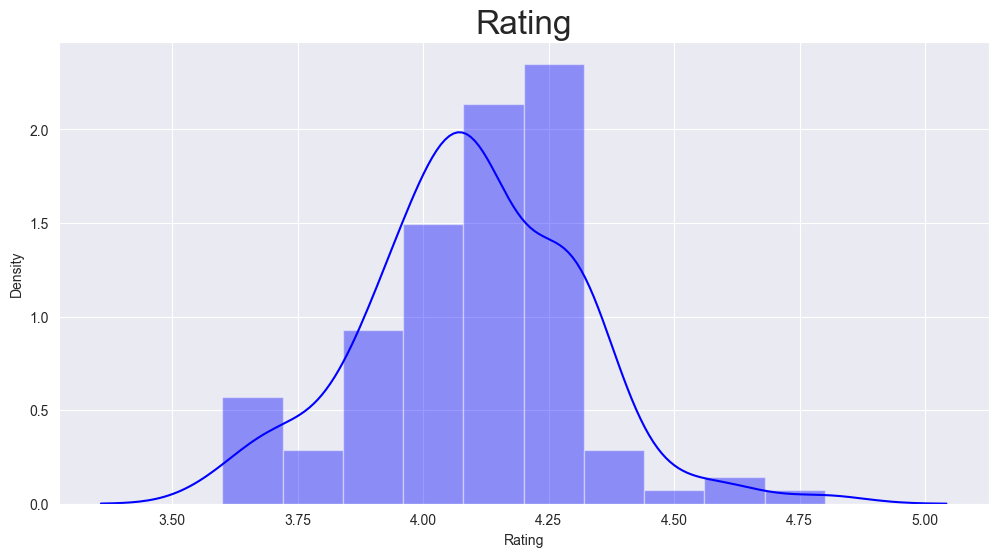

In [11]:
## Distribution plot of Rating

plt.figure(figsize=(12,6))
sns.distplot(df['Rating'], color='Blue')
plt.title('Rating', fontsize=24)

### Cost for Two Analysis

In [12]:
## now, for Cost_for_Two using unique() we can see that how many unique values are there.

df['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

- here we can see that values are in ₹ symbol. 

In [13]:
## to convert it into numeric, first we have to split the data and consider 1th position data.

df['Cost_for_Two'] = df['Cost_for_Two'].apply(lambda x:x.split(' ')[1]).astype('int64')

Text(0.5, 1.0, 'Cost for two people')

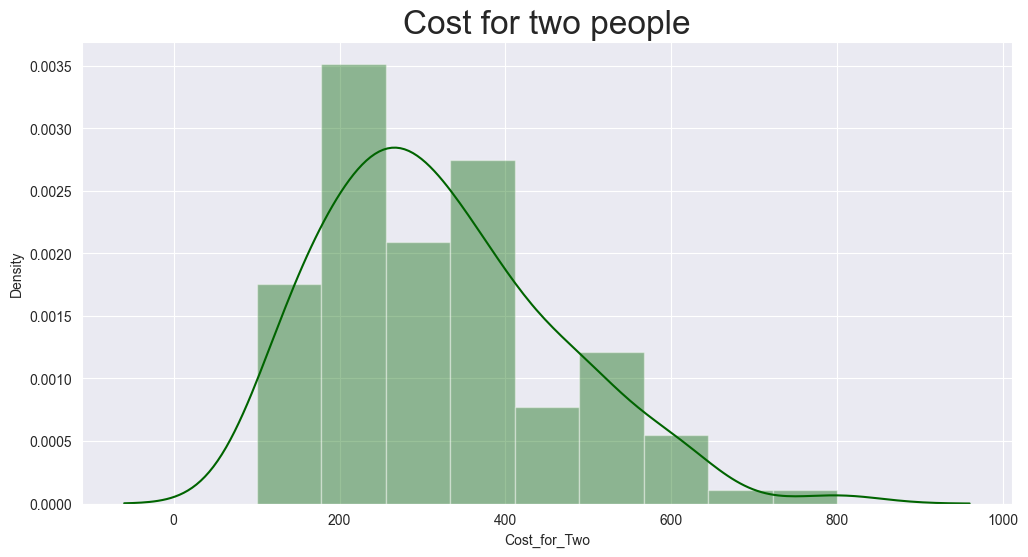

In [14]:
## Distribution plot of Cost for two

plt.figure(figsize=(12,6))
sns.distplot(df['Cost_for_Two'], color='DarkGreen')
plt.title('Cost for two people', fontsize=24)

### Statistic information of Dataset

In [15]:
## Using describe() we can see statistical information of dataset(only numerical columns).

df.describe()

,Rating,Cost_for_Two
count,117.000000,117.000000
mean,4.096581,320.760684
std,0.209240,137.850784
min,3.600000,100.000000
25%,4.000000,200.000000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


#####  Insights :

- **4.1** is Avarage Rating of Swiggy: Banglore outlet dataset.
- whereas, **320** is avarage cost for two people for restaurant.
- Maximum Rating given by people is **4.8**.
- whereas, **800** is maximum cost for two peoples.

#### Rating vs Cost_for_Two

In [16]:
fig = px.scatter(df,x='Rating',y='Cost_for_Two',
                 color='Cost_for_Two',size='Cost_for_Two', title='Rating vs Cost for Two',
                 color_continuous_scale="sunset", 
                 size_max=25)
fig.show()

- Getting more numbers of Rating between cost of 100 to 500.
- Also, we can see that have highest cost 800 at Rating of 4.

In [17]:
df.query('Rating > 4 & Cost_for_Two <= 200').sort_values(['Rating','Cost_for_Two'],ascending=False)

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
78,Khichdi Experiment,"Home Food, Healthy Food, Indian","Koramangala, Koramangala",4.8,200
82,Natural Ice Cream,Ice Cream,"Near Wipro Park Signal, Koramangala",4.6,150
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
59,Sagar fast food,"Chinese, South Indian, North Indian, Fast Food","8TH BLOCK, Koramangala",4.3,200
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200
88,Khawa Karpo,Chinese,"Koramangala, Koramangala",4.3,178
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
95,NIC Natural Ice Creams,"Ice Cream, Desserts","Koramangla, Koramangala",4.2,120


- In location,Koramangala have Most of Shops with good Rating at minmum cost.
- Khichdi Experiment in Koramangala has highest Rating **4.8** with minimum cost **200**.
- whereas in IceCream, Natural Ice Cream in Koramangala has second highest Rating **4.6** with minmum cost of **150**.

### Location Analysis

In [18]:
## let's take Location column

df['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

- here, we see that there are multiple unique values of location but in that data area is in last posiion of given location.
- so, we can find Area of that location by split.

In [19]:
## create function to find area of location.

def dis(feature):
    lst=[]
    for i in df[feature]:
        lst.append(i.split(',')[-1].lstrip(' '))
    return lst

In [20]:
## area of each location given in dataset.

locations = dis('Location')
locations

['Koramangala',
 'HSR',
 'Koramangala',
 'HSR',
 'Koramangala',
 'Koramangala',
 'BTM',
 'BTM',
 'HSR',
 'Koramangala',
 'BTM',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'BTM',
 'Koramangala',
 'HSR',
 'BTM',
 'Koramangala',
 'BTM',
 'Koramangala',
 'HSR',
 'BTM',
 'Koramangala',
 'BTM',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'BTM',
 'Koramangala',
 'BTM',
 'Koramangala',
 'BTM',
 'HSR',
 'HSR',
 'Koramangala',
 'HSR',
 'BTM',
 'HSR',
 'BTM',
 'Koramangala',
 'BTM',
 'BTM',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'BTM',
 'Koramangala',
 'BTM',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'HSR',
 'HSR',
 'Koramangala',
 'BTM',
 'HSR',
 'Koramangala',
 'Koramangala',
 'Koramangala',
 'BTM',
 'BTM',
 'Koramangala',
 'BTM',
 'BTM',
 'BTM',
 'HSR',
 'Koramangala',
 'HSR',
 'Jayanagar',
 'Koramangala',
 'BTM',
 'Koramangala',
 'Koramangala',
 'BTM',
 'BTM',
 'Koramangala',
 'Koramang

In [21]:
## total area of locations are 4.

set(locations)

{'BTM', 'HSR', 'Jayanagar', 'Koramangala'}

In [22]:
## create new column with Area.

df['Area'] = locations

In [23]:
## again, see dataset.

df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala


In [24]:
## Groupby 'Area' and 'Rating' columns and take mean of Cost_for_Two for each Rating with respect to Area.

area_rate_cost=df.groupby(['Area','Rating']).mean().round(1).reset_index()
area_rate_cost

,Area,Rating,Cost_for_Two
0,BTM,3.7,300.0
1,BTM,3.9,412.5
2,BTM,4.0,331.2
3,BTM,4.1,343.6
4,BTM,4.2,230.0
5,BTM,4.3,289.3
6,BTM,4.5,450.0
7,HSR,3.6,200.0
8,HSR,3.8,250.0
9,HSR,3.9,250.0


In [25]:
# sns.barplot(x=df['Rating'],y=df['Cost_for_Two'],hue=df['Area'])

fig = px.bar(area_rate_cost,x='Area',y='Cost_for_Two',color='Rating')

fig.show()

- Koramangala Area has **Highest Cost** for two people and also **Highest rated area** comparing other three areas.
- Jayanagar Area has only one data with Rating is **4.3** and cost is **300**.
- Whereas, Areas like BTM and HSR has almost same amount of cost.

## Revenue generated by Area

In [26]:
## create pivot table to generate revenue using Area and Cost_for_Two column.

a_r_c=pd.pivot_table(df,values=['Cost_for_Two'],index=['Area'],aggfunc=np.sum).reset_index()
a_r_c

,Area,Cost_for_Two
0,BTM,11518
1,HSR,6650
2,Jayanagar,300
3,Koramangala,19061


- Highest Revenue generated by Koramangala area.
- By Jayanagar generates lowest Revenue as we have only one data entry of that area which is logically correct.
- BTM and HSR are at second and third position for generating good revenue.

In [27]:
labels=list(set(locations))
colors = ['goldenrod', 'darksalmon', 'saddlebrown', 'firebrick']
fig = px.pie(a_r_c, values='Cost_for_Two', names='Area',labels=labels,hole=0.4, title='Pie Chart - Area wrt percentage of Cost')

fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial', pull=[0, 0, 0.1, 0],
                  marker=dict(colors=colors,line=dict(color='#000000', width=1)))
fig.show()

- here, **50.8%** of Revenue generated by Koramangala Area.
- Also, **30.7%** and **17.7%** of Revenue generates by BTM and HSR respectively.
- **0.799%** Revenue by Jayanagar.

## Number of Shop in Perticular Area

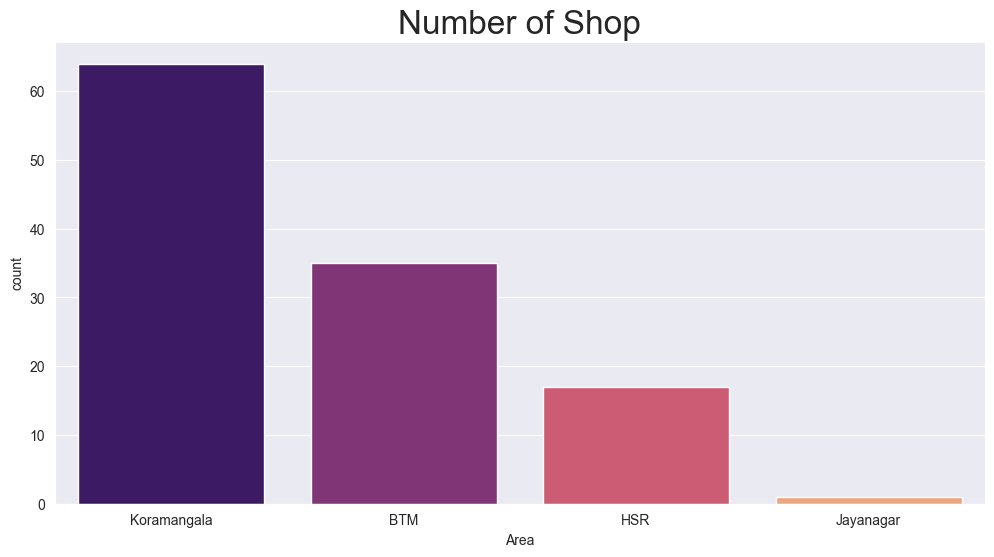

In [28]:
## Plot a countplot to see how many shops are there in each area.

plt.figure(figsize=(12,6))
plt.title('Number of Shop', fontsize=24)
sns.countplot(x = 'Area', data = df, order = df['Area'].value_counts().index, palette='magma')
plt.show()

- Maximum number of shops are in Koramangala, which is obvious.

### Each Area Distribution

- First, take ***Koramangala*** Area to check distributions of other features.

In [29]:
## save dataFrame where Area is 'Koramangala'.

df_koramangala = df[df['Area'] == 'Koramangala']

In [30]:
## print head() of koramangala's dataset.

df_koramangala.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350,Koramangala
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150,Koramangala


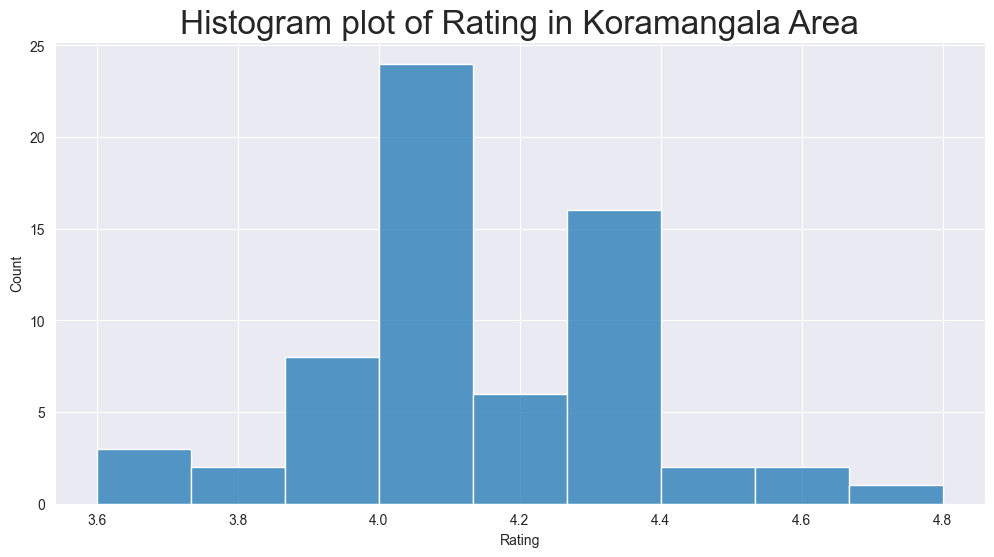

In [31]:
## Histrogram of Rating

plt.figure(figsize=(12,6))
plt.title('Histogram plot of Rating in Koramangala Area',fontsize=24)
sns.histplot(df_koramangala['Rating'])
plt.show()

- here, most of restaurants have rating between **4.0** to **4.2**

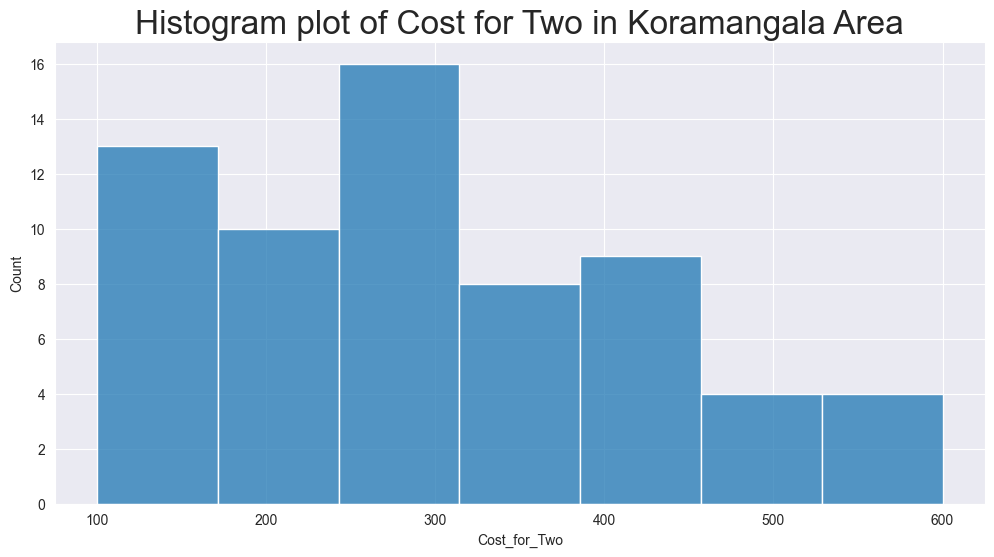

In [32]:
## Histrogram of Cost_for_Two

plt.figure(figsize=(12,6))
plt.title('Histogram plot of Cost for Two in Koramangala Area',fontsize=24)
sns.histplot(df_koramangala['Cost_for_Two'])
plt.show()

-  most of the number of data of cost for two person lies between **200** to **300**

In [33]:
df_koramangala.describe()

,Rating,Cost_for_Two
count,64.000000,64.000000
mean,4.126563,297.828125
std,0.217666,134.319632
min,3.600000,100.000000
25%,4.000000,200.000000
50%,4.100000,254.000000
75%,4.300000,399.250000
max,4.800000,600.000000


In [34]:
df_k_res = df_koramangala.groupby(['Shop_Name','Rating']).mean().sort_values(['Rating','Cost_for_Two'],
                                                                             ascending=[False,True]).reset_index()
df_k_res

,Shop_Name,Rating,Cost_for_Two
0,Khichdi Experiment,4.8,200.0
1,Natural Ice Cream,4.6,150.0
2,Corner House Ice Cream,4.6,250.0
3,Bowl 99,4.4,200.0
4,China Pearl,4.4,527.0
...,...,...,...
59,Yumlane Pizza,3.8,150.0
60,Barista,3.8,350.0
61,800 Momos,3.7,150.0
62,Onesta,3.7,250.0


In [35]:
fig = px.bar(df_k_res, x=df_k_res['Cost_for_Two'][:10], y=df_k_res['Shop_Name'][:10], color=df_k_res['Rating'][:10],
             color_continuous_scale='aggrnyl', text_auto='.2s', 
             title='Top 10 Shops High Rated Restaurants in Koramangala',
             labels={'x' : 'Cost for Two' , 'y' : 'Shop Name' , 'color' : 'Rating'})

fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()

***BTM***

In [36]:
## save dataFrame where Area is 'BTM'.

df_BTM = df[df['Area'] == 'BTM']

In [37]:
## print head() of BTM's dataset.

df_BTM.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200,BTM
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500,BTM
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500,BTM
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200,BTM
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300,BTM


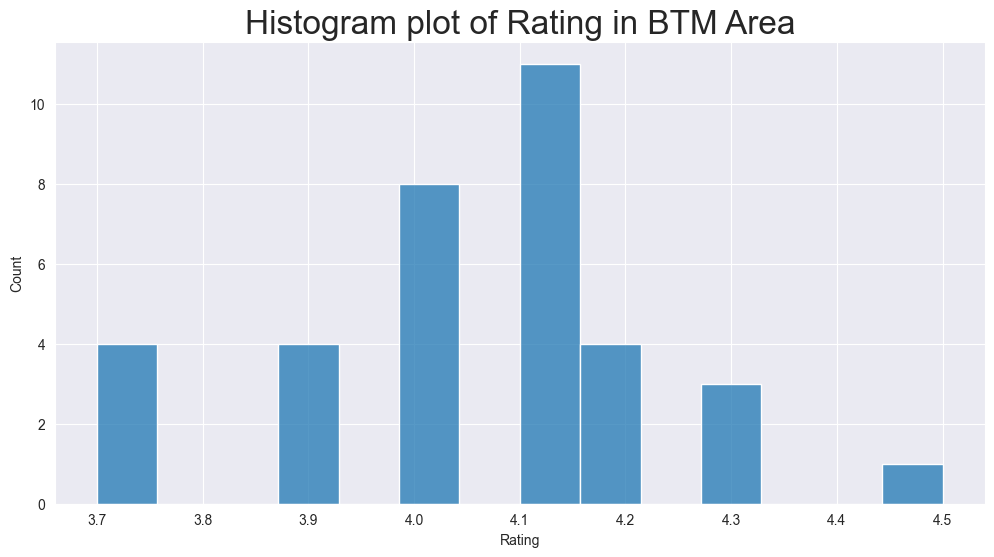

In [38]:
## Histrogram of Rating

plt.figure(figsize=(12,6))
plt.title('Histogram plot of Rating in BTM Area',fontsize=24)
sns.histplot(df_BTM['Rating'])
plt.show()

- here, most of restaurants have rating **4.1**

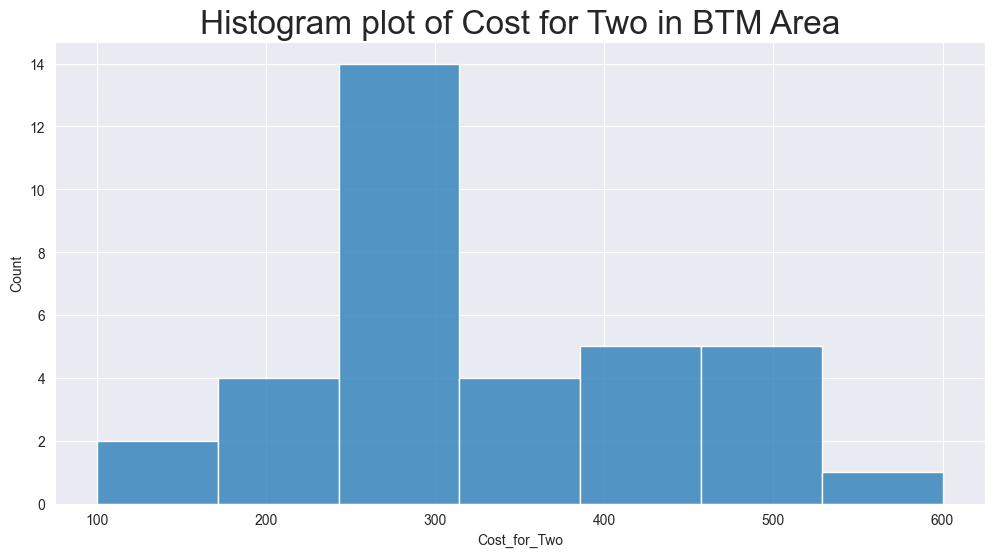

In [39]:
## Histrogram of Cost_for_Two

plt.figure(figsize=(12,6))
plt.title('Histogram plot of Cost for Two in BTM Area',fontsize=24)
sns.histplot(df_BTM['Cost_for_Two'])
plt.show()

-  most of the number of data of cost for two person lies at **300**.

In [40]:
df_BTM.describe()

,Rating,Cost_for_Two
count,35.000000,35.000000
mean,4.048571,329.085714
std,0.180476,116.406330
min,3.700000,100.000000
25%,4.000000,250.000000
50%,4.100000,300.000000
75%,4.100000,400.000000
max,4.500000,600.000000


In [41]:
df_b_res = df_BTM.groupby(['Shop_Name','Rating']).mean().sort_values(['Rating','Cost_for_Two'],
                                                                             ascending=[False,True]).reset_index()
df_b_res

,Shop_Name,Rating,Cost_for_Two
0,Chinese Bae,4.5,450.0
1,Oottupura,4.3,268.0
2,Just Bake - Cakes & confectioners,4.3,300.0
3,Venu's Donne Biryani,4.3,300.0
4,Tandoori Merchant,4.2,100.0
5,Ghar Ka Khana,4.2,220.0
6,BIRIYANI TASTE MASTH(BTM),4.2,300.0
7,Bengali Fun Foods,4.2,300.0
8,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
9,Svadu Pure Ghee Sweets,4.1,200.0


In [42]:
fig = px.bar(df_k_res, x=df_b_res['Cost_for_Two'][:10], y=df_b_res['Shop_Name'][:10], color=df_b_res['Rating'][:10],
             color_continuous_scale='brwnyl', text_auto='.2s', 
             title='Top 10 Shops High Rated Restaurants in BTM',
             labels={'x' : 'Cost for Two' , 'y' : 'Shop Name' , 'color' : 'Rating'})

fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()

***HSR***

In [43]:
## save dataFrame where Area is 'HSR'.

df_HSR = df[df['Area'] == 'HSR']

In [44]:
## print head() of HSR's dataset.

df_HSR.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350,HSR
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350,HSR
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150,HSR


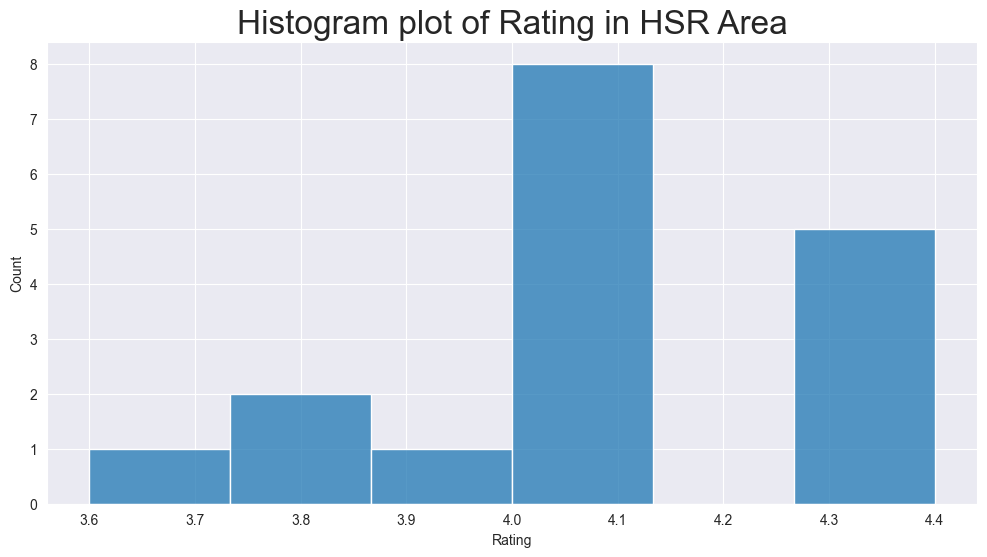

In [45]:
## Histrogram of Rating

plt.figure(figsize=(12,6))
plt.title('Histogram plot of Rating in HSR Area',fontsize=24)
sns.histplot(df_HSR['Rating'])
plt.show()

- here, most of restaurants have rating **4.1** and also some of the restaurants have rating between **4.3** to **4.4**

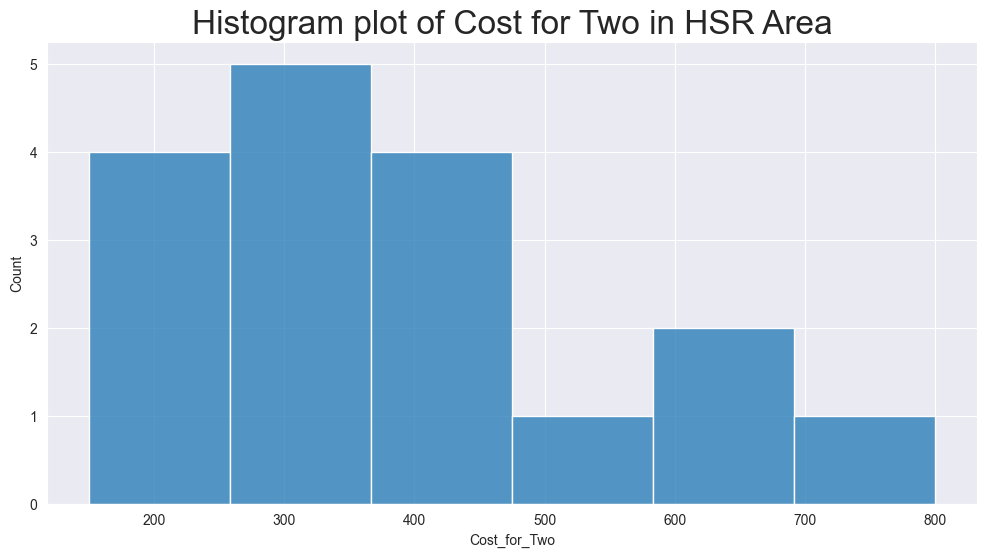

In [46]:
## Histrogram of Cost_for_Two

plt.figure(figsize=(12,6))
plt.title('Histogram plot of Cost for Two in HSR Area',fontsize=24)
sns.histplot(df_HSR['Cost_for_Two'])
plt.show()

-  most of the number of data of cost for two person lies between **200** to **500**.

In [47]:
df_HSR.describe()

,Rating,Cost_for_Two
count,17.000000,17.000000
mean,4.070588,391.176471
std,0.222948,174.315890
min,3.600000,150.000000
25%,4.000000,300.000000
50%,4.100000,350.000000
75%,4.300000,450.000000
max,4.400000,800.000000


In [48]:
df_h_res = df_HSR.groupby(['Shop_Name','Rating']).mean().sort_values(['Rating','Cost_for_Two'],
                                                                             ascending=[False,True]).reset_index().head(10)
df_h_res

,Shop_Name,Rating,Cost_for_Two
0,Al Daaz,4.4,400.0
1,Mumbai Tiffin,4.4,400.0
2,New Udupi Grand,4.3,150.0
3,Leon Grill,4.3,300.0
4,Cakewala,4.3,450.0
5,Hotel Manu,4.1,350.0
6,Shree Khana Khazana,4.1,350.0
7,Biriyani Zone,4.1,600.0
8,Dindigul Thalapakatti Biriyani,4.1,650.0
9,Donne Biriyani House,4.0,300.0


In [49]:
fig = px.bar(df_h_res, x=df_h_res['Cost_for_Two'][:10], y=df_h_res['Shop_Name'][:10], color=df_h_res['Rating'][:10],
             color_continuous_scale='RdBu', text_auto='.2s', 
             title='Top 10 Shops High Rated Restaurants in HSR',
             labels={'x' : 'Cost for Two' , 'y' : 'Shop Name' , 'color' : 'Rating'})

fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()

***Jayanagar***

In [50]:
## save dataFrame where Area is 'Jayanagar'.

df_jayanagar = df[df['Area'] == 'Jayanagar']

In [51]:
## print head() of jayanagar's dataset.

df_jayanagar.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
74,CRAVY WINGS - The American Diner,"American, Fast Food","Bannerghatta Road, Jayanagar",4.3,300,Jayanagar


In [52]:
df_jayanagar.describe()

,Rating,Cost_for_Two
count,1.0,1.0
mean,4.3,300.0
std,NaN,NaN
min,4.3,300.0
25%,4.3,300.0
50%,4.3,300.0
75%,4.3,300.0
max,4.3,300.0


- here, we have only one data which have rating **4.3** and cost **300**

### Restaurant Analysis
#### Now, we check for highest Rated Restaurants.

In [53]:
high_rated_restaurants = df[df['Rating'] >= 4]
high_rated_restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala
...,...,...,...,...,...,...
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200,Koramangala
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600,BTM
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193,Koramangala
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200,Koramangala


In [54]:
high_rated_restaurants = high_rated_restaurants.groupby(['Shop_Name','Rating']).mean().reset_index()
high_rated_restaurants

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [55]:
fig = px.scatter(high_rated_restaurants, x='Cost_for_Two', y='Rating',
                 size='Cost_for_Two', color='Rating',size_max=30 ,
                 title='Highest Rated Restaurants vs Cost')
fig.show()

- here, we can analyst that most of the good rated restaurants have budget friendly or affordable cost for two people in bangalore.

     - For the cost of ₹**200** to ₹**600** there are many restaurants with rating of **4.2** to **4.8**.
     

- There is highest costed at ₹**800** restaurant with rating of just **4**, which is very low as compared to others.
     - Whereas, there is one rastaurant with highest rating of **4.8** with very lower cost of just ₹**200**.

#### Let's Visualized Friendly Budget/Affordable Restaurants

In [56]:
## create dataFrame with Rating>=4 and Cost_for_two<=500

Affordable_res = df[(df['Rating'] >= 4) & (df['Cost_for_Two'] <= 500)].sort_values(['Cost_for_Two'],ascending=False)

Affordable_res

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
29,Nandhana Palace,"Biryani, Seafood, North Indian, Chinese, Desse...","Koramangala, Koramangala",4.0,500,Koramangala
110,Biryani Pot,"North Indian, Biryani","Madiwala Junction, BTM",4.0,500,BTM
93,Madeena Hotel,"Desserts, Mughlai, Seafood","5th Block Kormangala, Koramangala",4.1,500,Koramangala
92,BIRYANI CRAFTS,Indian,"BTM, BTM",4.1,500,BTM
86,Gyaani Da Punjabi Dhaba,North Indian,"2nd Stage, BTM",4.0,500,BTM
...,...,...,...,...,...,...
21,Maa Di Hatti,"Chinese, Healthy Food, North Indian","Jakkasandra Extn, Koramangala",4.0,129,Koramangala
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
95,NIC Natural Ice Creams,"Ice Cream, Desserts","Koramangla, Koramangala",4.2,120,Koramangala
89,99 VARIETY DOSA AND JUICE-Malli mane food court,"Fast Food, Juices, North Indian","Koramangala 1st block, Koramangala",4.1,100,Koramangala


In [57]:
a_r = Affordable_res.groupby(['Shop_Name','Rating']).mean().reset_index().sort_values(['Rating','Cost_for_Two']
                                                                                ,ascending=[False,True]).head(10)
a_r

,Shop_Name,Rating,Cost_for_Two
41,Khichdi Experiment,4.8,200.0
54,Natural Ice Cream,4.6,150.0
21,Corner House Ice Cream,4.6,250.0
20,Chinese Bae,4.5,450.0
16,Bowl 99,4.4,200.0
4,Al Daaz,4.4,400.0
50,Mumbai Tiffin,4.4,400.0
39,Kanti Sweets,4.3,150.0
56,New Udupi Grand,4.3,150.0
40,Khawa Karpo,4.3,178.0


In [58]:
fig = px.bar(a_r, x=a_r['Cost_for_Two'][:10], y=a_r['Shop_Name'][:10], color=a_r['Rating'][:10],
             color_continuous_scale='Plasma', text_auto='.2s', 
             title='Top 10 Shops High Rated Restaurants with minimal cost for two peoples',
             labels={'x' : 'Cost for Two' , 'y' : 'Shop Name' , 'color' : 'Rating'})

fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()

- **Khichdi Experiment** is most affordable restaurant with high rating.

### Cuisine Analysis

In [59]:
## check unique values

df['Cuisine'].unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [60]:
## build a function, which return dataframe with cuisine_name and numbers of occurence 

def df_Cuisine(data):

    Cuisines_category = {}

    for i in data['Cuisine'].unique():
        cu = i.replace(' ','').split(',')
        for c in cu:
            Cuisines = c
            if Cuisines in Cuisines_category:
                Cuisines_category[Cuisines] += 1
            else:
                Cuisines_category[Cuisines] = 1

    Cuisine_Analysis = pd.DataFrame({'Cuisine' : Cuisines_category.keys(),'Frequency' : Cuisines_category.values()})
        
    return Cuisine_Analysis

In [61]:
## analyzing cuisines from original(main) dataset

df_cuisine = df_Cuisine(df)

df_cuisine.sort_values('Frequency',ascending=False,inplace=True)

df_cuisine

,Cuisine,Frequency
11,Chinese,35
1,NorthIndian,32
5,SouthIndian,23
21,Biryani,18
6,FastFood,16
12,Desserts,15
19,Andhra,12
7,Beverages,9
9,American,8
20,Seafood,8


In [62]:
## let's visualize top 15 cuisine

fig = px.pie(values=df_cuisine['Frequency'][:15], names=df_cuisine['Cuisine'][:15],
             color =df_cuisine['Cuisine'][:15])
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False)
fig.update_layout(width=1000, height=550)
fig.show()

- here, Most popular **Top 3 Cuisine** of Bangalore - Swiggy dataset is **Chinese**, **North Indian** and **South Indian**.

In [63]:
## from Koramangala area's dataset

koramangala_cuisine = df_Cuisine(df_koramangala)

koramangala_cuisine.sort_values('Frequency',ascending=False,inplace=True)

koramangala_cuisine

,Cuisine,Frequency
6,Chinese,15
2,NorthIndian,14
1,SouthIndian,11
13,Biryani,10
3,FastFood,9
11,Desserts,8
17,American,6
4,Beverages,5
8,Pizzas,5
12,Andhra,5


In [64]:
## let's visualize top 15 cuisine from koramangala area

fig = px.pie(values=koramangala_cuisine['Frequency'][:15], names=koramangala_cuisine['Cuisine'][:15],
             color =koramangala_cuisine['Cuisine'][:15])
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False)
fig.update_layout(width=1000, height=550)
fig.show()

- here also **Top 3 Cuisine** of Koramangala area is **Chinese**, **North Indian** and **South Indian** with **14.2%**, **13.2%** and **10.4%** respectively.

- It's shows that people more like Chinese food and North Indian food in Koramangala Area.

In [65]:
## from BTM area's dataset

BTM_cuisine = df_Cuisine(df_BTM)

BTM_cuisine.sort_values('Frequency',ascending=False,inplace=True)

BTM_cuisine

,Cuisine,Frequency
2,Chinese,18
1,NorthIndian,16
4,SouthIndian,10
14,Biryani,8
7,Andhra,7
0,FastFood,6
5,Desserts,6
6,Kerala,4
8,Beverages,4
12,Hyderabadi,4


In [66]:
## let's visualize top 15 cuisine from BTM area

fig = px.pie(values=BTM_cuisine['Frequency'][:15], names=BTM_cuisine['Cuisine'][:15],
             color =BTM_cuisine['Cuisine'][:15])
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False)
fig.update_layout(width=1000, height=550)
fig.show()

- In BTM, **Top 3 Cuisine** of this area is **Chinese**, **North Indian** and **South Indian** with **19.1%**, **17%** and **10.6%** respectively.

- It's shows that here also people more like Chinese food and North Indian food.

In [67]:
## from HSR area's dataset

HSR_cuisine = df_Cuisine(df_HSR)

HSR_cuisine.sort_values('Frequency',ascending=False,inplace=True)

HSR_cuisine

,Cuisine,Frequency
0,NorthIndian,6
6,Chinese,4
10,SouthIndian,4
4,American,3
7,Desserts,3
15,Biryani,3
14,Jain,1
22,Snacks,1
21,Kebabs,1
20,Juices,1


In [68]:
## let's visualize top 15 cuisine from HSR area

fig = px.pie(values=HSR_cuisine['Frequency'][:15], names=HSR_cuisine['Cuisine'][:15],
             color =HSR_cuisine['Cuisine'][:15])
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False)
fig.update_layout(width=1000, height=550)
fig.show()

- **Top Cuisine** of HSR area is **North Indian**, **Chinese** and **South Indian** with **18.8%**, **12.5%** and **12.5%** respectively.

- It's shows that people more like North Indian food so we can assume that there must be north indian people are staying in the area.

In [69]:
## from original dataset

df.sort_values(['Rating','Shop_Name','Cost_for_Two'],ascending=[False,False,True],inplace=True)

df_sort = df.head(50)

In [70]:
## create sunbust chart for original dataset with area, rating, shop name and cuisine.

fig = px.sunburst(df_sort, path=['Area','Rating','Shop_Name','Cuisine'], values='Cost_for_Two')

fig.update_layout(margin = dict(t=15, l=15, r=15, b=15))

fig.show()

- Above Pie chart with Top 50 Restaurants of bangalore is easy to analyze by high ratings and low cost.

## Summary

- Swiggy has an average rating of 4.061, considered good by customers, and an average cost for two of 321 rupees.
- The highest rating and cost for two is 4.8 and 800 rupees, respectively.
- Restaurants in Bangalore City have ratings ranging from 4.0 to 4.8.
- The most popular food is from "Khichdi Experiment" with a rating of 4.8, and ice cream is more popular in Koramangala.
- Based on the distribution plot, more than 50% of the restaurants have a rating greater than 4.1 with a maximum rating of 4.8. 
- The area-wise ratings and cost for two has most restaurants in Koramangala 
- In BTM, most restaurants have a rating of 4.0 to 4.2 and a cost for two is around 300 rupees. 
- HSR having ratings of 4.0 or above and costs ranging from 200 to 500 rupees.
- Restaurants costing around 600 to 800 rupees for two people have ratings in between 4.0 to 4.1, which is too low compared to affordable/budget friendly restaurants.
- It can be seen that the most popular cuisine types sold by Bangalore restaurants are Chinese (19.9%), North Indian (18.2%), and South Indian (13.1%).